In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('SampleSuperstore.xls')

In [2]:
#Tratando os dados
df.head() #verificando os dados
df = df.drop(['Row ID', 'Postal Code','Customer Name'], axis=1)

In [3]:
df.info() #verificando se há valores nulos e os tipos de dados
df.duplicated().sum() #verificando se existem duplicatas
df.drop_duplicates(inplace=True) #removendo duplicatas
df.describe()  # Resumo estatístico, para detectar possíveis outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Region        9994 non-null   object        
 10  Product ID    9994 non-null   object        
 11  Category      9994 non-null   object        
 12  Sub-Category  9994 non-null   object        
 13  Product Name  9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:>

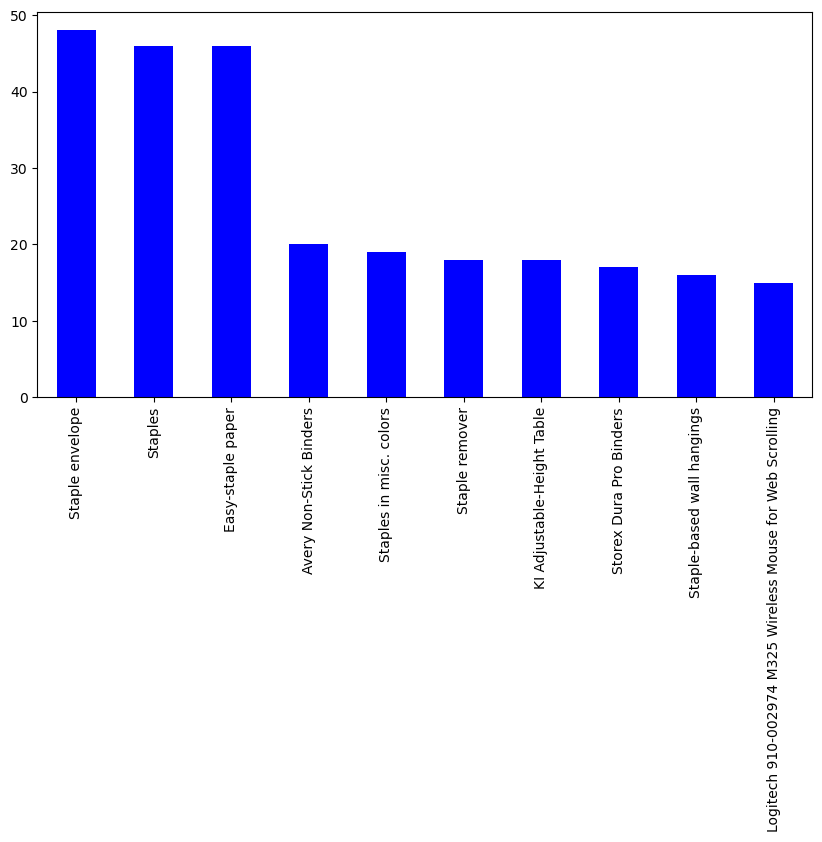

In [4]:
#analisando o produto mais vendido (Levando em consideração pessoas diferentes que compraram o mesmo produto)
df['Product Name'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'KI Adjustable-Height Table'),
  Text(1, 0, 'Staple-based wall hangings'),
  Text(2, 0, 'Situations Contoured Folding Chairs, 4/Set'),
  Text(3, 0, 'Eldon Wave Desk Accessories'),
  Text(4, 0, 'Global High-Back Leather Tilter, Burgundy'),
  Text(5, 0, 'Staple envelope'),
  Text(6, 0, 'Easy-staple paper'),
  Text(7, 0, 'Staples'),
  Text(8, 0, 'Avery Non-Stick Binders'),
  Text(9, 0, 'Staples in misc. colors'),
  Text(10, 0, 'Logitech 910-002974 M325 Wireless Mouse for Web Scrolling'),
  Text(11, 0, 'Kingston Digital DataTraveler 16GB USB 2.0'),
  Text(12, 0, 'Logitech Desktop MK120 Mouse and keyboard Combo'),
  Text(13, 0, 'Geemarc AmpliPOWER60'),
  Text(14, 0, 'Maxell 4.7GB DVD-R')])

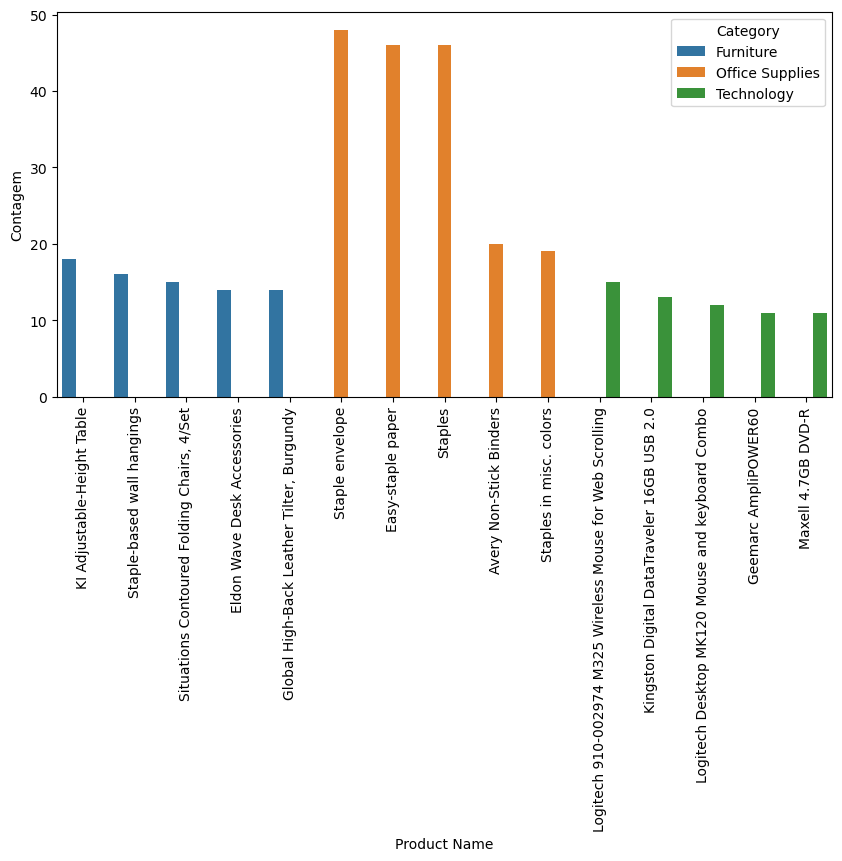

In [5]:
# analisando os produtos mais vendidos por categoria (Levando em consideração pessoas diferentes que compraram o mesmo produto)
tabelaaux = df.groupby('Category')['Product Name'].value_counts().groupby('Category').head(5).reset_index(name = 'Contagem')
plt.figure(figsize=(10,5))
sns.barplot(x='Product Name', y='Contagem', hue='Category', data=tabelaaux)
plt.xticks(rotation=90)



Análise de Desempenho por Categoria de Produto:

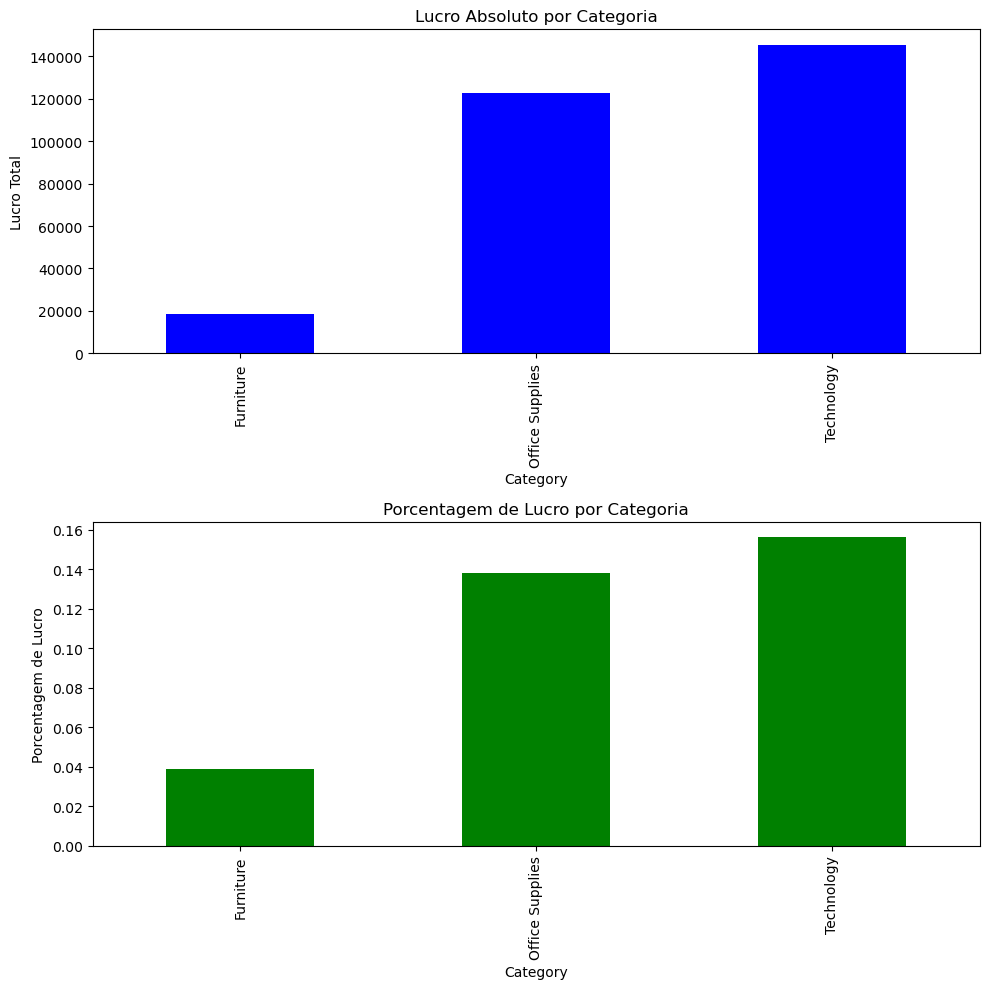

In [6]:
#Quais são as categorias de produtos que mais geram lucro? Quais geram menor lucro ou até prejuízo?

# Configurando a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 1: Lucro absoluto por categoria
df.groupby('Category')['Profit'].sum().sort_values().plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Lucro Absoluto por Categoria')
axes[0].set_ylabel('Lucro Total')

# Gráfico 2: Lucro percentual médio por categoria
df['Porcentagem'] = df['Profit'] / df['Sales']  # Calculando a porcentagem de lucro
df.groupby('Category')['Porcentagem'].mean().sort_values().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Porcentagem de Lucro por Categoria')
axes[1].set_ylabel('Porcentagem de Lucro')

plt.tight_layout()
plt.show()

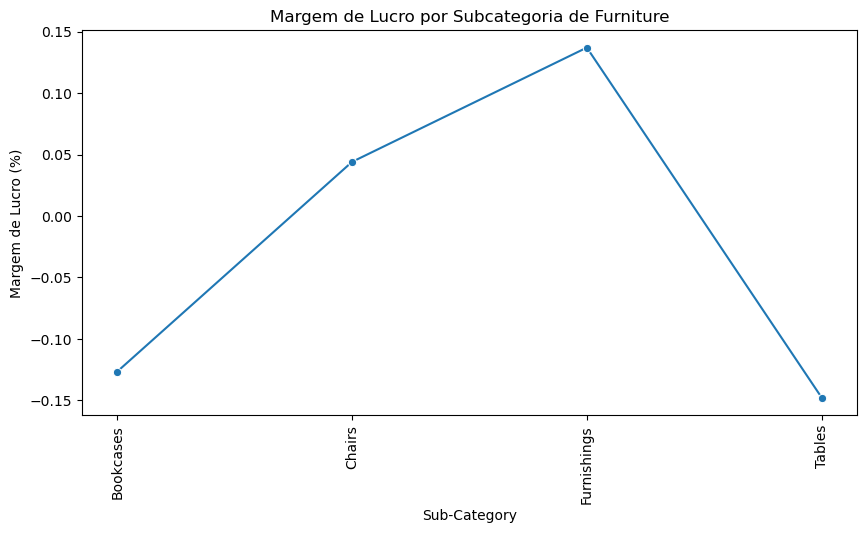

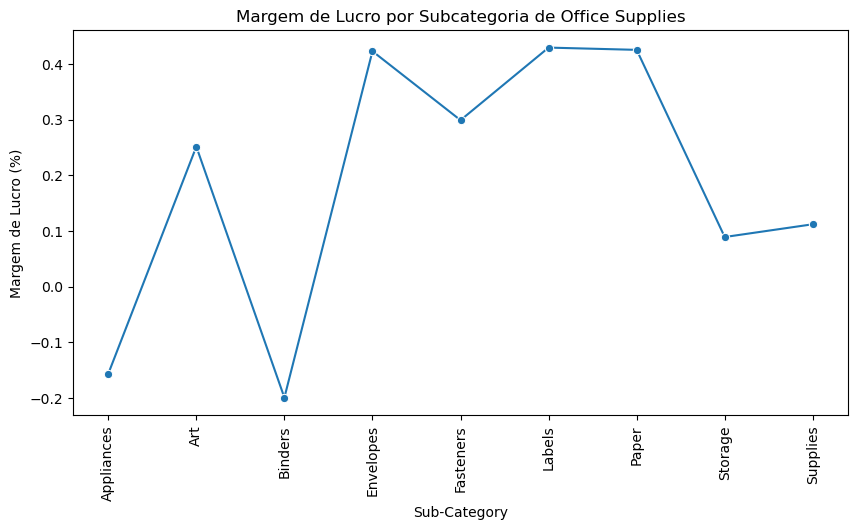

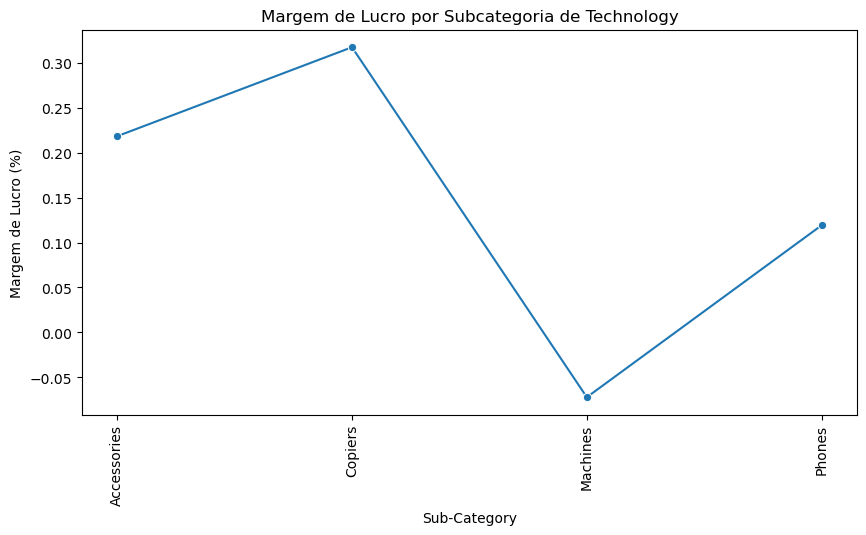

In [7]:
#Como a margem de lucro varia entre as subcategorias de cada categoria?
tabelaaux = df.groupby(['Category', 'Sub-Category'])['Porcentagem'].mean().reset_index()
categorias = df['Category'].unique()
for categoria in categorias:
    df_aux = tabelaaux[tabelaaux['Category'] == categoria]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Sub-Category', y='Porcentagem', data=df_aux, marker='o')
    plt.title(f'Margem de Lucro por Subcategoria de {categoria}')
    plt.ylabel('Margem de Lucro (%)')
    plt.xticks(rotation=90)
    plt.show()

Eficiência nas Vendas e Descontos:

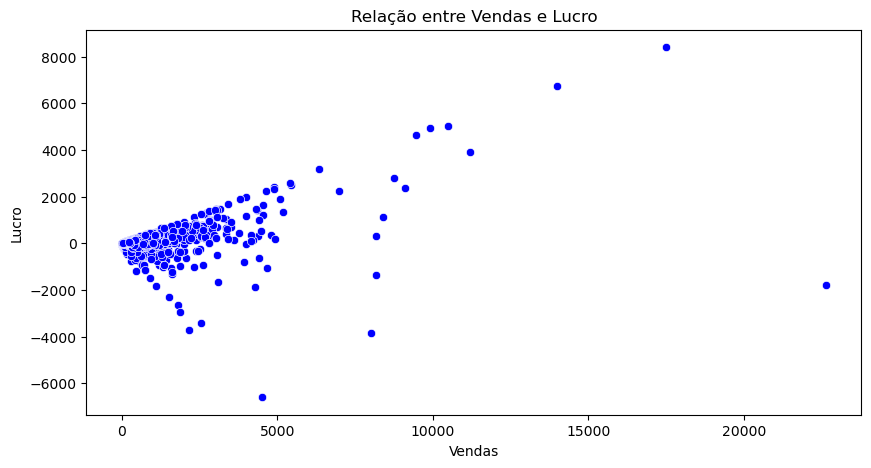

In [8]:
#Qual a relação entre as vendas e o lucro?
plt.figure(figsize=(10,5))
sns.scatterplot(x='Sales', y='Profit', data=df, color='blue')
plt.title('Relação entre Vendas e Lucro')
plt.xlabel('Vendas')
plt.ylabel('Lucro')
plt.show()



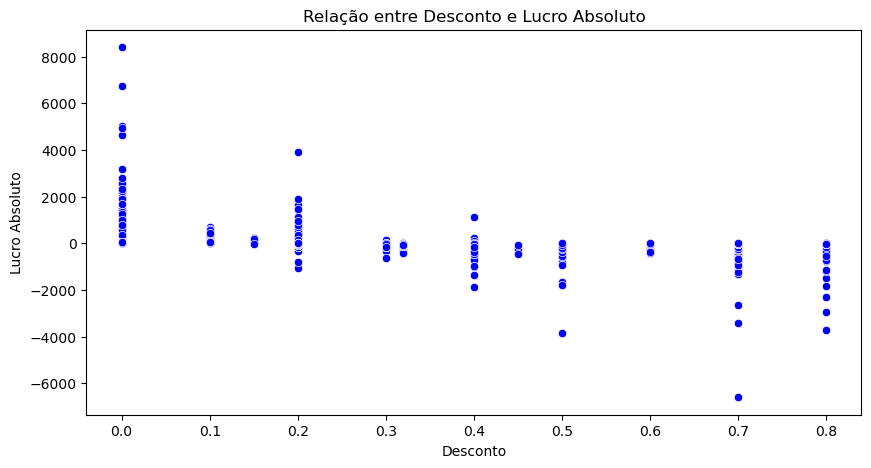

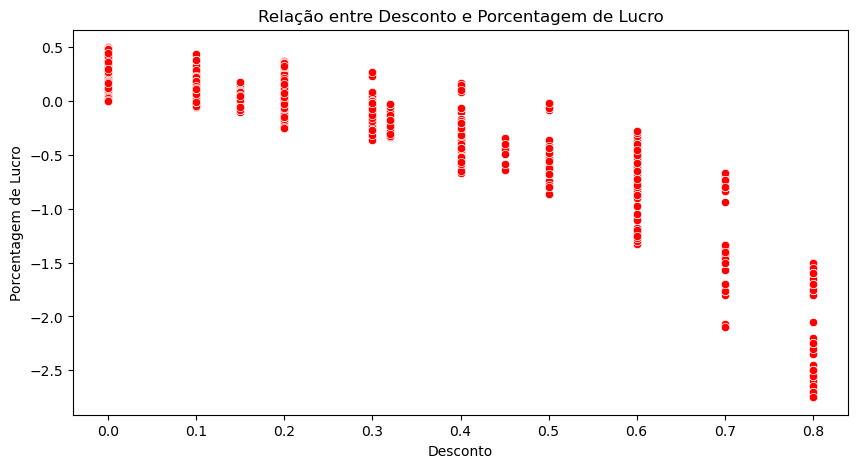

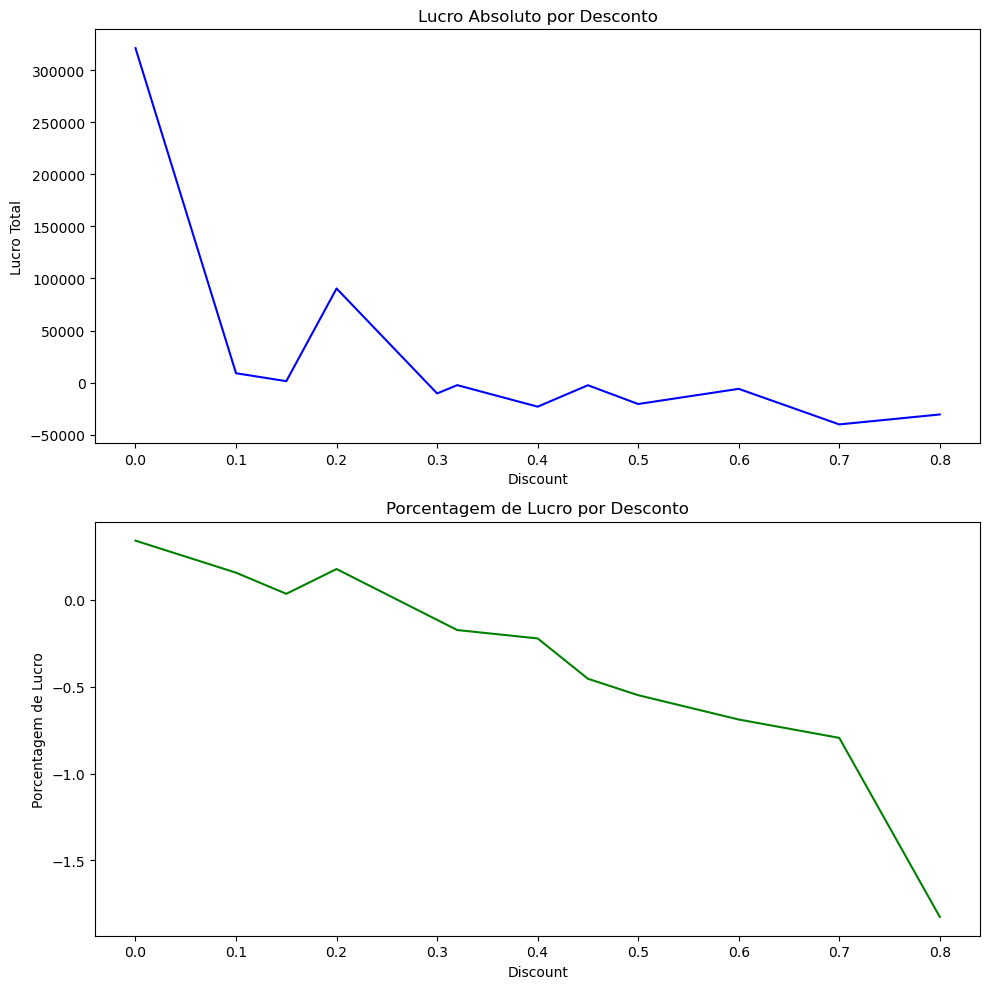

In [9]:
#Como os descontos oferecidos impactam o lucro? (absoluto e percentual)
# Gráfico 1: Relação entre Desconto e Lucro Absoluto
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Profit', data=df, color='blue')
plt.title('Relação entre Desconto e Lucro Absoluto')
plt.xlabel('Desconto')
plt.ylabel('Lucro Absoluto')
plt.show()

# Gráfico 2: Relação entre Desconto e Porcentagem de Lucro
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Porcentagem', data=df, color='red')
plt.title('Relação entre Desconto e Porcentagem de Lucro')
plt.xlabel('Desconto')
plt.ylabel('Porcentagem de Lucro')
plt.show()


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 3: Lucro total absoluto por desconto
df.groupby('Discount')['Profit'].sum().plot( ax=axes[0], color='blue')
axes[0].set_title('Lucro Absoluto por Desconto')
axes[0].set_ylabel('Lucro Total')

# Gráfico 4: Lucro percentual médio por desconto
df.groupby('Discount')['Porcentagem'].mean().plot( ax=axes[1], color='green')
axes[1].set_title('Porcentagem de Lucro por Desconto')
axes[1].set_ylabel('Porcentagem de Lucro')

plt.tight_layout()
plt.show()

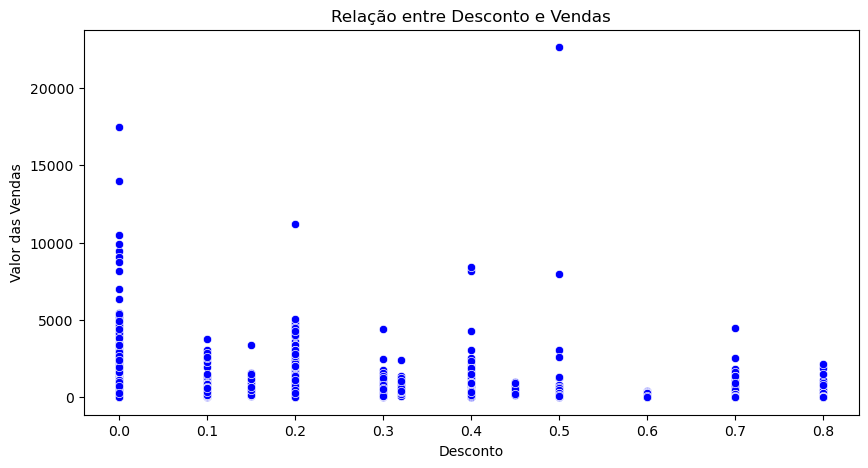

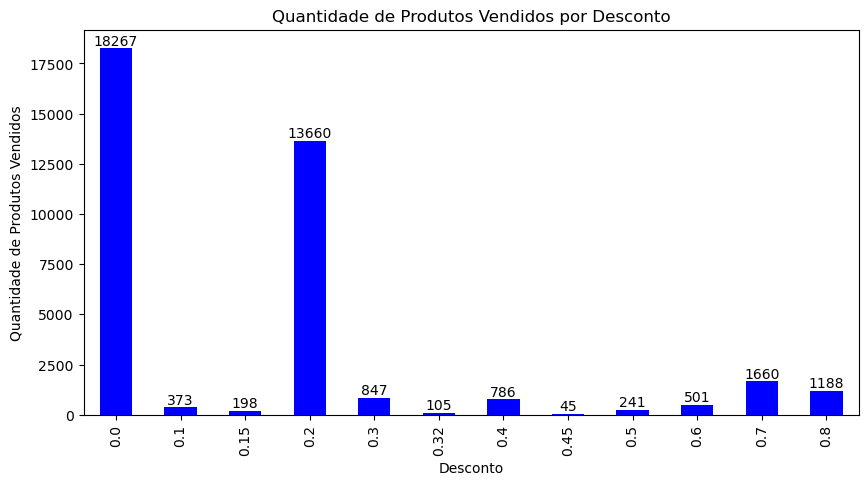

In [10]:
#Há uma correlação entre maiores descontos e maiores vendas?

#tamanho do desconto e o valor das vendas
plt.figure(figsize=(10,5))
sns.scatterplot(x='Discount', y='Sales', data=df, color='blue')
plt.title('Relação entre Desconto e Vendas')
plt.xlabel('Desconto')
plt.ylabel('Valor das Vendas')
plt.show()

#tamanho do desconto e a quantidade de produtos vendidos
quantidade_produtos = df.groupby('Discount')['Quantity'].sum()
ax = quantidade_produtos.plot(kind='bar', figsize=(10, 5), color='blue')
plt.title('Quantidade de Produtos Vendidos por Desconto')
plt.xlabel('Desconto')
plt.ylabel('Quantidade de Produtos Vendidos')
ax.bar_label(ax.containers[0])
plt.show()


In [11]:
#Existe alguma subcategoria ou produto que está sendo vendido com desconto e gerando prejuízo constante?

# Subcategorias
tabelaSubCategorias = df[df['Discount'] > 0].groupby('Sub-Category')['Profit'].sum().reset_index()
sub_categoria_prejuizo = tabelaSubCategorias[tabelaSubCategorias['Profit'] < 0] #sub-categorias com desconto que geram prejuízo
print("Subcategorias que geram prejuízo:")
print(sub_categoria_prejuizo)

# Produtos
tabelaProdutos = df[df['Discount'] > 0].groupby('Product Name')['Profit'].sum().reset_index()
produto_prejuizo = tabelaProdutos[tabelaProdutos['Profit'] < 0] #produtos com desconto que geram prejuízo
print("\nProdutos que geram prejuízo:")
print(produto_prejuizo)


Subcategorias que geram prejuízo:
   Sub-Category      Profit
1    Appliances  -5045.7307
3       Binders  -9092.6874
4     Bookcases  -9548.2677
9   Furnishings  -3788.8253
11     Machines -23753.0654
14      Storage  -4249.3451
15     Supplies  -2907.4937
16       Tables -31001.7808

Produtos que geram prejuízo:
                                           Product Name     Profit
11                     12-1/2 Diameter Round Wall Clock   -23.9760
13       2300 Heavy-Duty Transfer File Systems by Perma    -2.7478
17    3.6 Cubic Foot Counter Height Office Refrigerator -1284.5432
18                             36X48 HARDFLOOR CHAIRMAT   -61.0518
19       3D Systems Cube Printer, 2nd Generation, White  -467.9964
...                                                 ...        ...
1646  Zebra GK420t Direct Thermal/Thermal Transfer P...  -938.2800
1649                         Zipper Ring Binder Pockets    -5.0856
1650                  i.Sound Portable Power - 8000 mAh   -60.4086
1653          

Análise de Segmentos de Clientes:

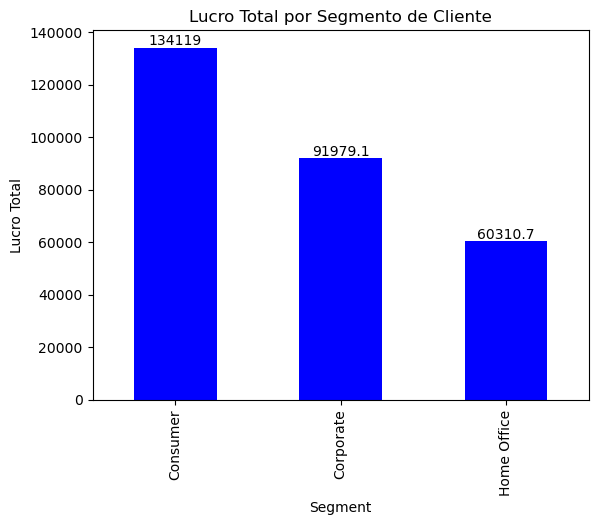

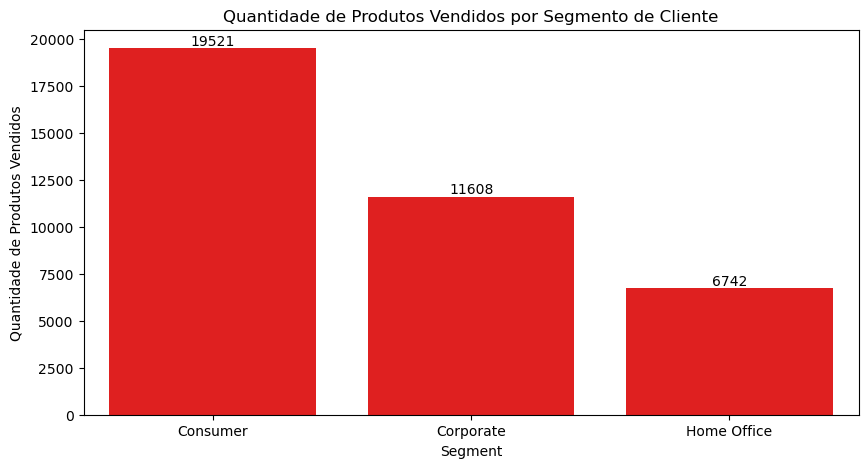

In [12]:
#Qual segmento de cliente (Consumer, Corporate, Home Office) gera o maior lucro?
ax = df.groupby('Segment')['Profit'].sum().plot(kind='bar', color='blue')
plt.title('Lucro Total por Segmento de Cliente')
plt.ylabel('Lucro Total')
ax.bar_label(ax.containers[0])
plt.show()

#Existe uma correlação entre o tipo de cliente (segmento) e a quantidade de produtos comprados?
tabelaSegmento = df.groupby('Segment')['Quantity'].sum().reset_index()
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Segment', y='Quantity', data=tabelaSegmento, color='red')
plt.title('Quantidade de Produtos Vendidos por Segmento de Cliente')
plt.ylabel('Quantidade de Produtos Vendidos')
ax.bar_label(ax.containers[0])
plt.show()

Eficiência da Logística:

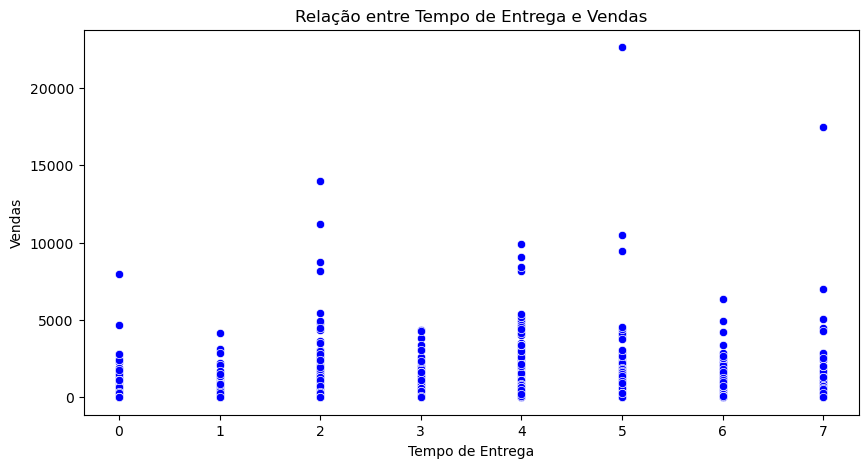

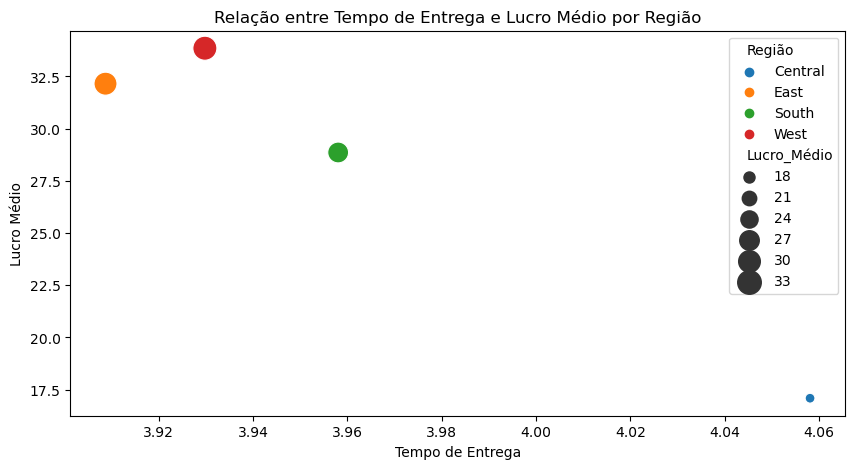

In [13]:
#Como o tempo de entrega (diferente entre a "Order Date" e "Ship Date") impacta nas vendas?
df['Tempo_Entrega'] = (df['Ship Date'] - df['Order Date']).dt.days
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tempo_Entrega', y='Sales', data=df, color='blue')
plt.title('Relação entre Tempo de Entrega e Vendas')
plt.xlabel('Tempo de Entrega')
plt.ylabel('Vendas')
plt.show()

#Áreas com tempo de entrega mais rápido têm maiores lucros?
#1. Calculando a média de lucro por região e tempo de entrega
tabelaTempoEntrega = df.groupby('Region')['Tempo_Entrega'].mean().reset_index()
tabelaTempoEntrega = tabelaTempoEntrega.merge(df.groupby('Region')['Profit'].mean().reset_index(), on='Region')
tabelaTempoEntrega.columns = ['Região', 'Tempo_Entrega', 'Lucro_Médio']

#2. Plotando o gráfico
plt.figure(figsize=(10,5))
sns.scatterplot(x='Tempo_Entrega', y='Lucro_Médio', hue='Região', size='Lucro_Médio',sizes=(50, 300), data=tabelaTempoEntrega, legend='brief')
plt.title('Relação entre Tempo de Entrega e Lucro Médio por Região')
plt.xlabel('Tempo de Entrega')
plt.ylabel('Lucro Médio')
plt.show()

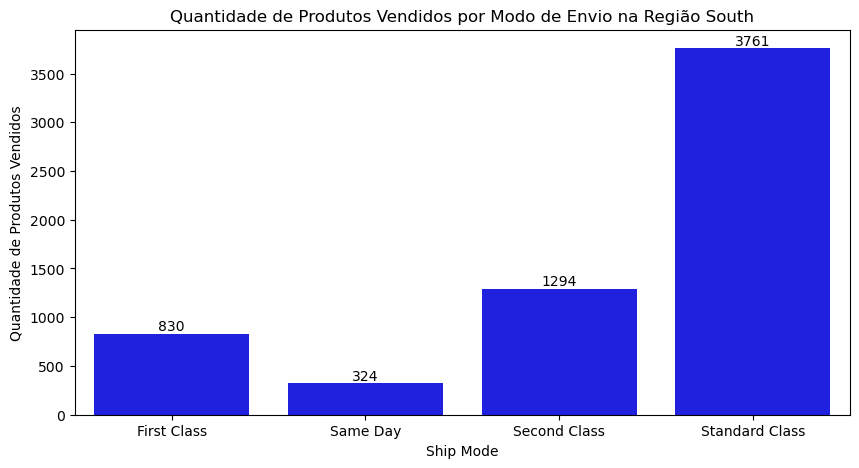

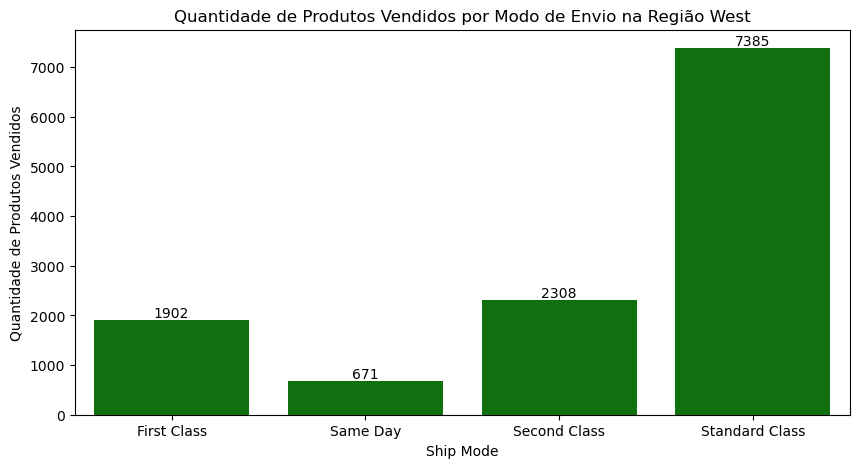

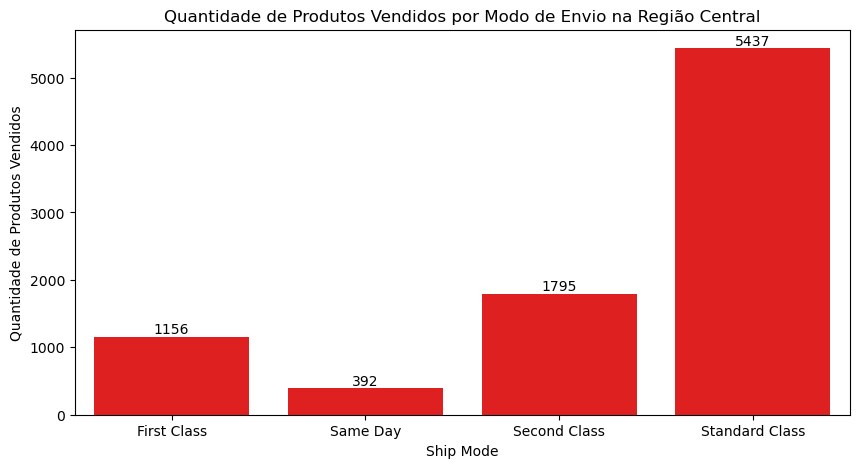

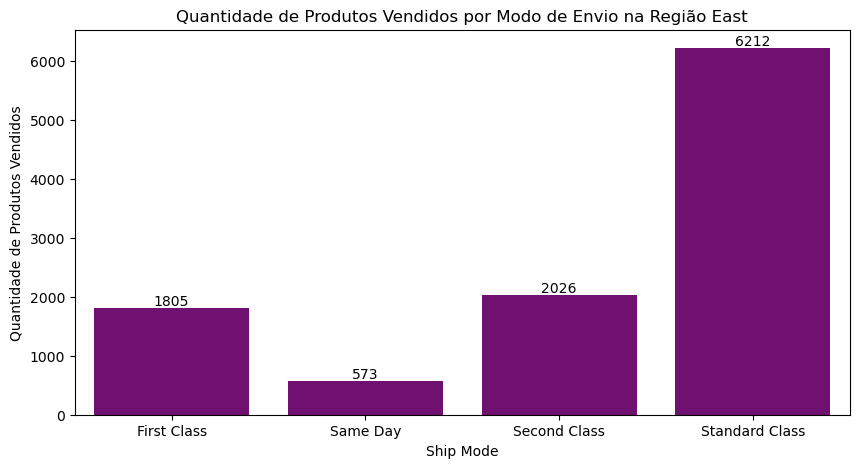

In [14]:
#Existe uma relação entre a região (por exemplo, "South", "West") e o modo de envio (Second Class, Standard Class, etc.) 
#que afeta o desempenho nas vendas?

tabelaRegiao = df.groupby(['Region','Ship Mode'])['Quantity'].sum().reset_index()
cores = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'cyan'] # Lista de cores que será usada para os gráficos

# Loop para gerar um gráfico por região
for i, regiao in enumerate(df['Region'].unique()):
    df_aux = tabelaRegiao[tabelaRegiao['Region'] == regiao]
    plt.figure(figsize=(10, 5))
    aux = sns.barplot(x='Ship Mode', y='Quantity', data=df_aux, color=cores[i % len(cores)])
    plt.title(f'Quantidade de Produtos Vendidos por Modo de Envio na Região {regiao}')
    plt.ylabel('Quantidade de Produtos Vendidos')
    aux.bar_label(aux.containers[0]) # Adicionando os valores em cima das barras
    plt.show()

Rentabilidade por Região Geográfica:

C:\Users\mneto\AppData\Local\Temp\ipykernel_10992\3683316188.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tabelaRegiao = df.groupby('Region')['Sales', 'Profit'].sum().reset_index()


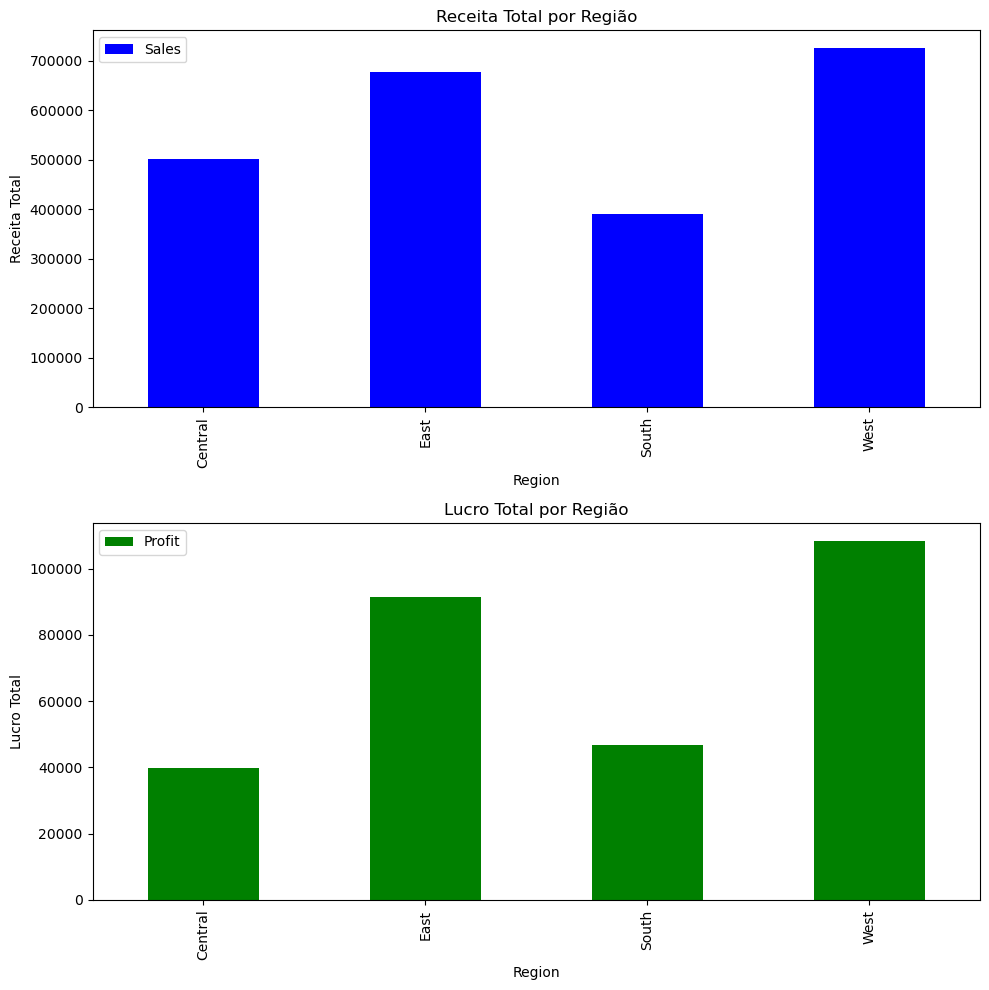

In [15]:
#Quais são as regiões que geram maior receita e lucro?
#1. Calculando a receita e o lucro total por região
tabelaRegiao = df.groupby('Region')['Sales', 'Profit'].sum().reset_index()

#2. Plotando o gráfico
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Gráfico 1: Receita total por região
tabelaRegiao.plot(x='Region', y='Sales', kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Receita Total por Região')
axes[0].set_ylabel('Receita Total')

# Gráfico 2: Lucro total por região
tabelaRegiao.plot(x='Region', y='Profit', kind='bar', ax=axes[1], color='green')
axes[1].set_title('Lucro Total por Região')
axes[1].set_ylabel('Lucro Total')

plt.tight_layout()
plt.show()



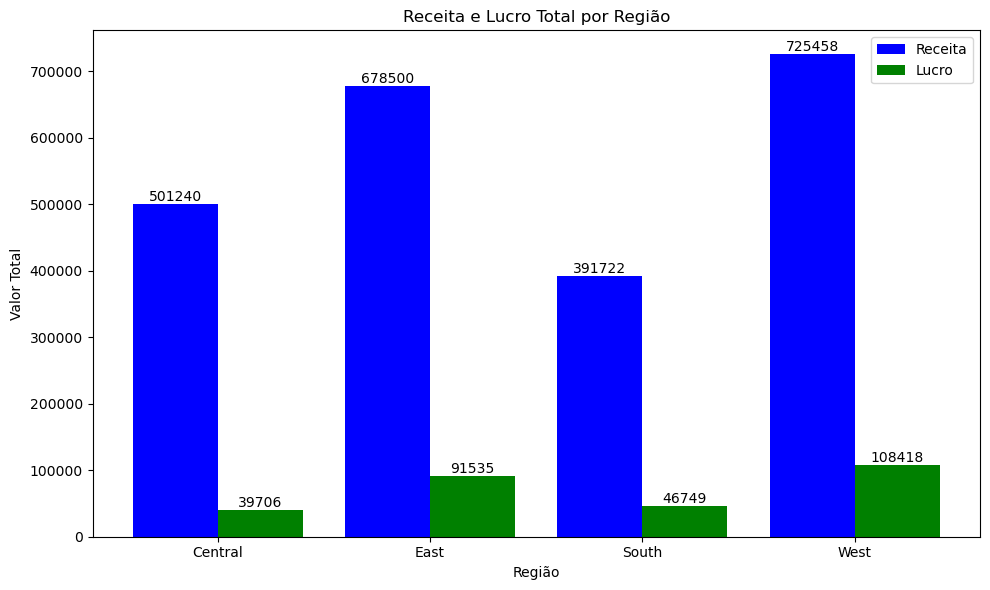

In [16]:
#Alguma região específica apresenta vendas altas, mas margens de lucro baixas?

fig, ax = plt.subplots(figsize=(10, 6))
largura_barra = 0.4
posicoes = range(len(tabelaRegiao))

# Plotar as barras de Receita
barras_receita = ax.bar([p - largura_barra/2 for p in posicoes], tabelaRegiao['Sales'], width=largura_barra, label='Receita', color='blue')

# Plotar as barras de Lucro
barras_lucro = ax.bar([p + largura_barra/2 for p in posicoes], tabelaRegiao['Profit'], width=largura_barra, label='Lucro', color='green')

# Adicionar títulos e rótulos
ax.set_title('Receita e Lucro Total por Região')
ax.set_xlabel('Região')
ax.set_ylabel('Valor Total')
ax.set_xticks(posicoes)
ax.set_xticklabels(tabelaRegiao['Region'])

# Adicionar legenda
ax.legend()

# Usar bar_label para exibir os valores em cima das barras
ax.bar_label(barras_receita, fmt='%.0f', label_type='edge')
ax.bar_label(barras_lucro, fmt='%.0f', label_type='edge')

# Exibir o gráfico
plt.tight_layout()
plt.show()

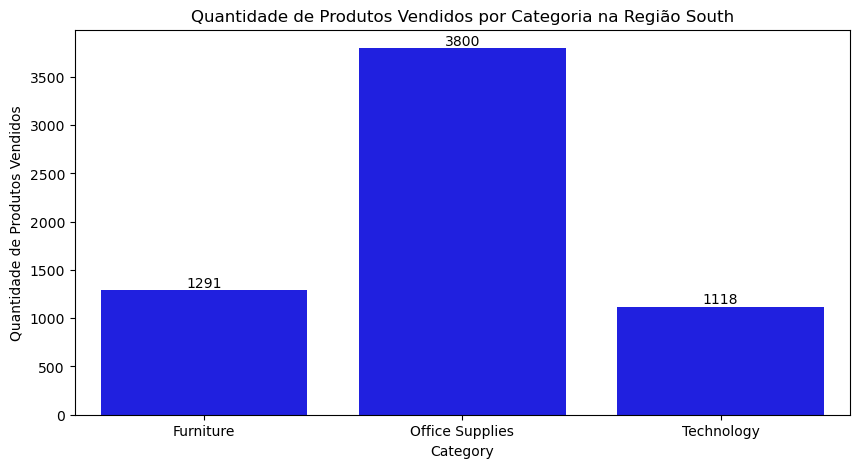

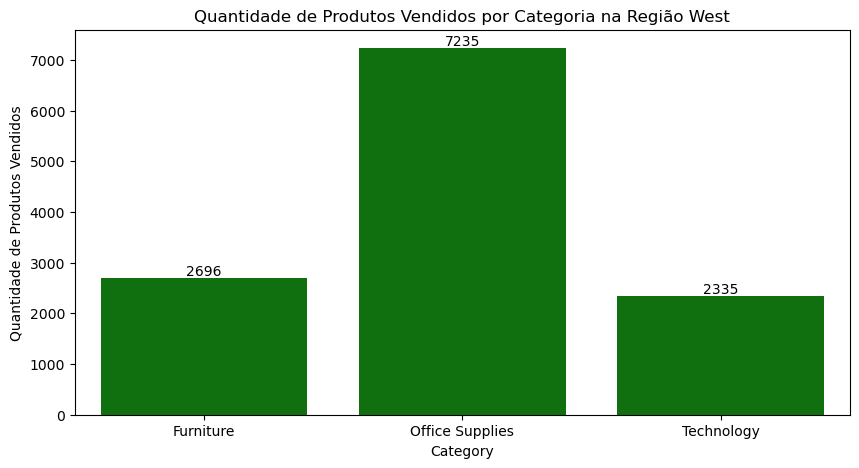

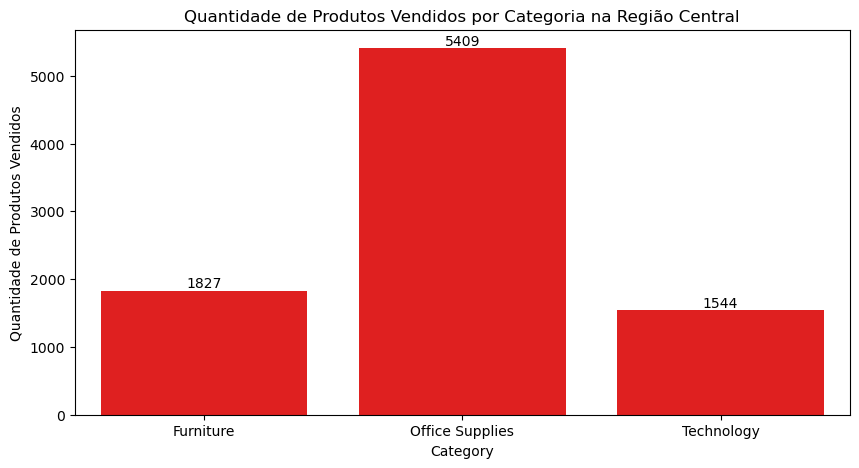

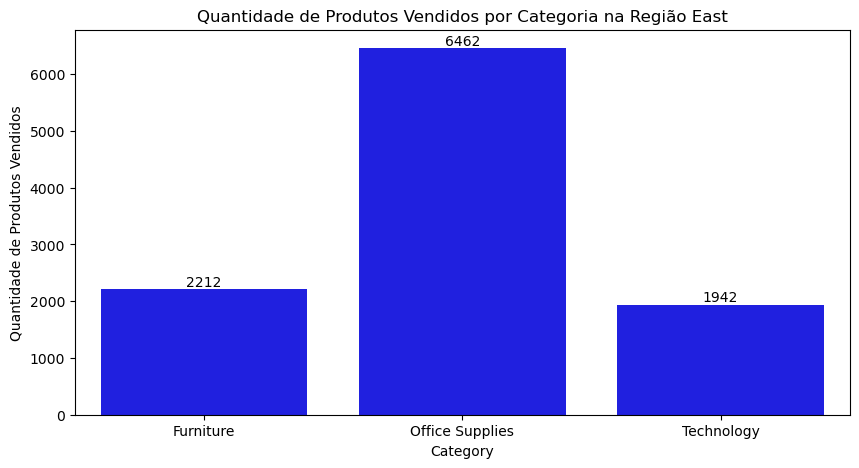

In [17]:
#Existe uma correlação entre a região e a categoria de produtos mais vendida?
tabelaRegiaoCategoria = df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()
cores = ['blue', 'green', 'red'] # Lista de cores que será usada para os gráficos

# Loop para gerar um gráfico por região

for i, regiao in enumerate(df['Region'].unique()):
    df_aux = tabelaRegiaoCategoria[tabelaRegiaoCategoria['Region'] == regiao]
    plt.figure(figsize=(10, 5))
    aux = sns.barplot(x='Category', y='Quantity', data=df_aux, color=cores[i % len(cores)])
    plt.title(f'Quantidade de Produtos Vendidos por Categoria na Região {regiao}')
    plt.ylabel('Quantidade de Produtos Vendidos')
    aux.bar_label(aux.containers[0]) # Adicionando os valores em cima das barras
    plt.show()

    

Desempenho de Produtos Específicos:

In [18]:
#Quais produtos ou subcategorias estão apresentando consistentemente bom desempenho em termos de lucro?

#Produtos
tabelaProdutos = df.groupby('Product Name')['Sales', 'Profit'].sum().reset_index()
tabelaProdutos['Porcentagem'] = tabelaProdutos['Profit'] / tabelaProdutos['Sales']

# Produtos com bom desempenho (Porcentagem de lucro maior que 15%)
produtos_melhor_desempenho = tabelaProdutos[tabelaProdutos['Porcentagem'] > 0.15]
display(produtos_melhor_desempenho)

#Subcategorias
tabelaSubCategorias = df.groupby('Sub-Category')['Sales', 'Profit'].sum().reset_index()
tabelaSubCategorias['Porcentagem'] = tabelaSubCategorias['Profit'] / tabelaSubCategorias['Sales']

# Subcategorias com bom desempenho (Porcentagem de lucro maior que 15%)
subcategorias_melhor_desempenho = tabelaSubCategorias[tabelaSubCategorias['Porcentagem'] > 0.15]
display(subcategorias_melhor_desempenho)


C:\Users\mneto\AppData\Local\Temp\ipykernel_10992\2751200231.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tabelaProdutos = df.groupby('Product Name')['Sales', 'Profit'].sum().reset_index()


,Product Name,Sales,Profit,Porcentagem
0,"""While you Were Out"" Message Book, One Form pe...",25.228,10.3880,0.411765
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300,16.7678,0.406000
2,#10 Self-Seal White Envelopes,108.682,52.1230,0.479592
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,223.1408,0.456410
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,115.2806,0.402134
...,...,...,...,...
1840,Zebra ZM400 Thermal Label Printer,6965.700,3343.5360,0.480000
1841,Zebra Zazzle Fluorescent Highlighters,100.928,20.6720,0.204819
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660,115.6440,0.242105
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554,171.2648,0.386992


C:\Users\mneto\AppData\Local\Temp\ipykernel_10992\2751200231.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tabelaSubCategorias = df.groupby('Sub-Category')['Sales', 'Profit'].sum().reset_index()


,Sub-Category,Sales,Profit,Porcentagem
0,Accessories,167380.318,41936.6357,0.250547
1,Appliances,107532.161,18138.0054,0.168675
2,Art,27118.792,6527.7870,0.240711
6,Copiers,149528.030,55617.8249,0.371956
7,Envelopes,16476.402,6964.1767,0.422676
8,Fasteners,3024.280,949.5182,0.313965
10,Labels,12486.312,5546.2540,0.444187
12,Paper,78479.206,34053.5693,0.433918


In [19]:
#Algum produto parece estar com vendas altas, mas lucro baixo ou negativo?

# Produtos com vendas altas e lucro baixo ou negativo
produtos_lucro_baixo = tabelaProdutos[(tabelaProdutos['Sales'] > 5000) & (tabelaProdutos['Porcentagem'] < 0.15)]
pd.options.display.float_format = '{:.5f}'.format
display(produtos_lucro_baixo)


,Product Name,Sales,Profit,Porcentagem
155,Apple iPhone 5,12996.60000,1611.57840,0.12400
167,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",7539.71220,780.33020,0.10350
168,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",5184.08100,-126.44100,-0.02439
169,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",5492.88500,15.04900,0.00274
282,Bady BDG101FRU Card Printer,9279.88400,1327.98340,0.14310
...,...,...,...,...
1551,Tennsco Double-Tier Lockers,9630.85600,429.78820,0.04463
1556,Tennsco Single-Tier Lockers,9158.29600,-825.74800,-0.09016
1557,"Tennsco Snap-Together Open Shelving Units, Sta...",6819.31200,181.66200,0.02664
1621,Wilson Electronics DB Pro Signal Booster,8878.40000,515.52000,0.05806


In [20]:
#Existe algum produto que está performando abaixo da média e precisa de mais atenção, como ajuste de preço ou aumento de marketing?

# Produtos com vendas abaixo da média
produtos_abaixo_media = tabelaProdutos[tabelaProdutos['Sales'] < tabelaProdutos['Sales'].mean()]
print("Produtos com vendas abaixo da média:")
display(produtos_abaixo_media)

# Produtos com lucro abaixo da média
produtos_lucro_abaixo_media = tabelaProdutos[tabelaProdutos['Porcentagem'] < tabelaProdutos['Porcentagem'].mean()]
print("\nProdutos com lucro abaixo da média:")
display(produtos_lucro_abaixo_media)

# Produtos com vendas e lucro abaixo da média
produtos_vendas_e_lucro_abaixo_media = tabelaProdutos[
    (tabelaProdutos['Sales'] < tabelaProdutos['Sales'].mean()) &
    (tabelaProdutos['Porcentagem'] < tabelaProdutos['Porcentagem'].mean())
]

print("\nProdutos com vendas e lucro abaixo da média:")
display(produtos_vendas_e_lucro_abaixo_media)



Produtos com vendas abaixo da média:


,Product Name,Sales,Profit,Porcentagem
0,"""While you Were Out"" Message Book, One Form pe...",25.22800,10.38800,0.41176
1,"#10 Gummed Flap White Envelopes, 100/Box",41.30000,16.76780,0.40600
2,#10 Self-Seal White Envelopes,108.68200,52.12300,0.47959
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.90400,223.14080,0.45641
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.67200,115.28060,0.40213
...,...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,477.66000,115.64400,0.24211
1846,iOttie HLCRIO102 Car Mount,215.89200,-11.99400,-0.05556
1847,iOttie XL Car Mount,223.88800,-50.37480,-0.22500
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.55400,171.26480,0.38699



Produtos com lucro abaixo da média:


,Product Name,Sales,Profit,Porcentagem
10,12 Colored Short Pencils,18.20000,3.01600,0.16571
11,12-1/2 Diameter Round Wall Clock,551.44800,91.10880,0.16522
13,2300 Heavy-Duty Transfer File Systems by Perma,344.72400,20.98320,0.06087
14,"24 Capacity Maxi Data Binder Racks, Pearl",3537.24000,536.90250,0.15179
17,3.6 Cubic Foot Counter Height Office Refrigerator,2946.20000,-872.07520,-0.29600
...,...,...,...,...
1842,Zipper Ring Binder Pockets,81.74400,11.73120,0.14351
1843,i.Sound Portable Power - 8000 mAh,413.32200,-58.81890,-0.14231
1844,iHome FM Clock Radio with Lightning Dock,699.90000,17.49750,0.02500
1846,iOttie HLCRIO102 Car Mount,215.89200,-11.99400,-0.05556



Produtos com vendas e lucro abaixo da média:


,Product Name,Sales,Profit,Porcentagem
10,12 Colored Short Pencils,18.20000,3.01600,0.16571
11,12-1/2 Diameter Round Wall Clock,551.44800,91.10880,0.16522
13,2300 Heavy-Duty Transfer File Systems by Perma,344.72400,20.98320,0.06087
18,36X48 HARDFLOOR CHAIRMAT,369.24800,-40.49140,-0.10966
23,3M Organizer Strips,83.16000,10.15200,0.12208
...,...,...,...,...
1842,Zipper Ring Binder Pockets,81.74400,11.73120,0.14351
1843,i.Sound Portable Power - 8000 mAh,413.32200,-58.81890,-0.14231
1844,iHome FM Clock Radio with Lightning Dock,699.90000,17.49750,0.02500
1846,iOttie HLCRIO102 Car Mount,215.89200,-11.99400,-0.05556


Tendências Sazonais:

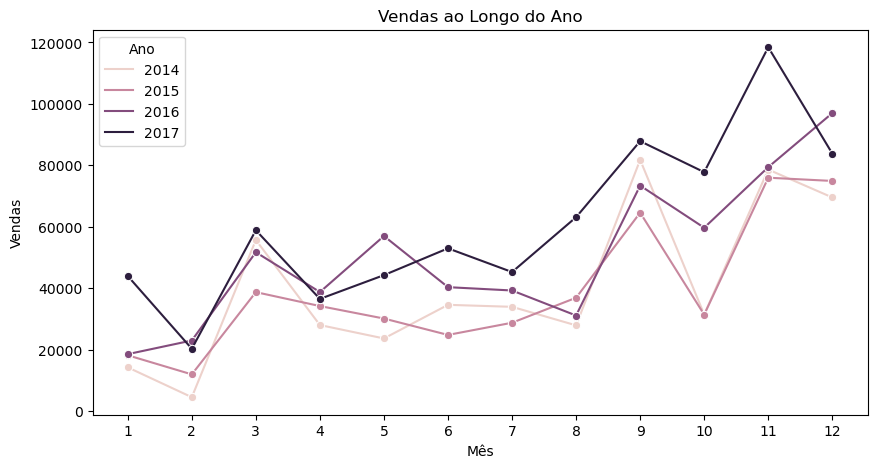

In [21]:
#As vendas variam ao longo do ano? 
df['Mes'] = df['Order Date'].dt.month
df['Ano'] = df['Order Date'].dt.year
tabelaVendas = df.groupby(['Ano', 'Mes'])['Sales'].sum().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10,5))
sns.lineplot(x='Mes', y='Sales', hue='Ano', data=tabelaVendas, marker='o')
plt.title('Vendas ao Longo do Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(range(1, 13))
plt.show()


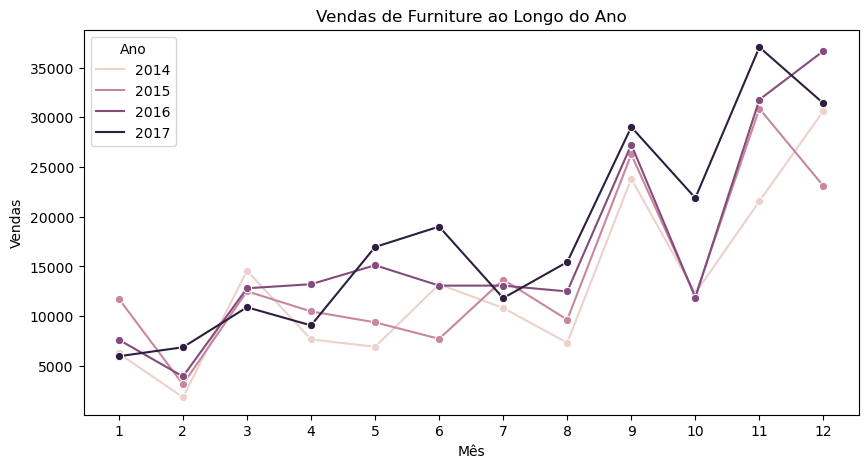

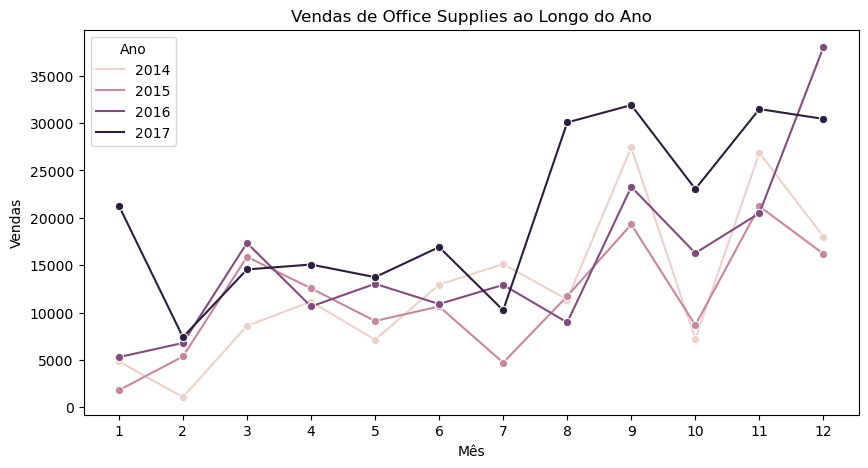

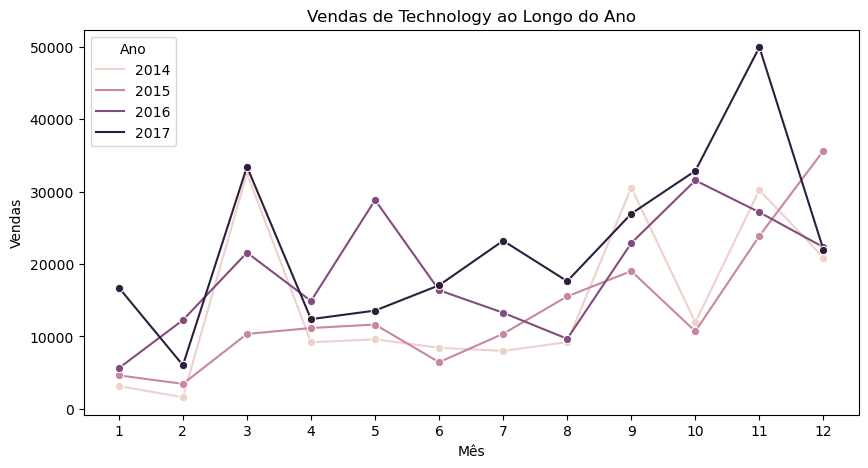

In [22]:
#Quais são os períodos de pico nas vendas para as principais categorias de produtos?
tabelaCategoria = df.groupby(['Category', 'Ano', 'Mes'])['Sales'].sum().reset_index()
categorias = df['Category'].unique()

for categoria in categorias:
    df_aux = tabelaCategoria[tabelaCategoria['Category'] == categoria]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Mes', y='Sales', hue='Ano', data=df_aux, marker='o')
    plt.title(f'Vendas de {categoria} ao Longo do Ano')
    plt.xlabel('Mês')
    plt.ylabel('Vendas')
    plt.xticks(range(1, 13))
    plt.show()

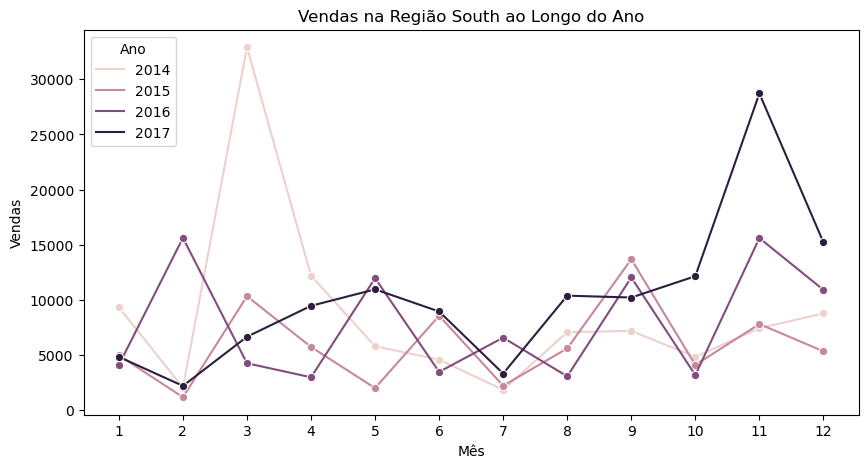

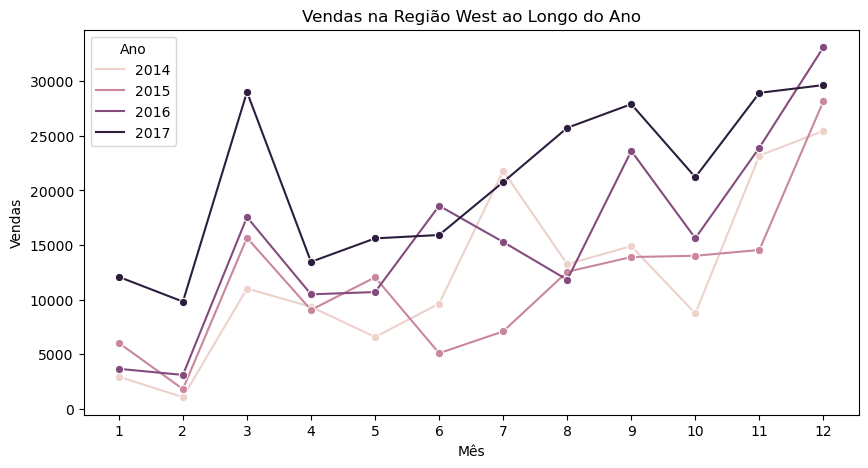

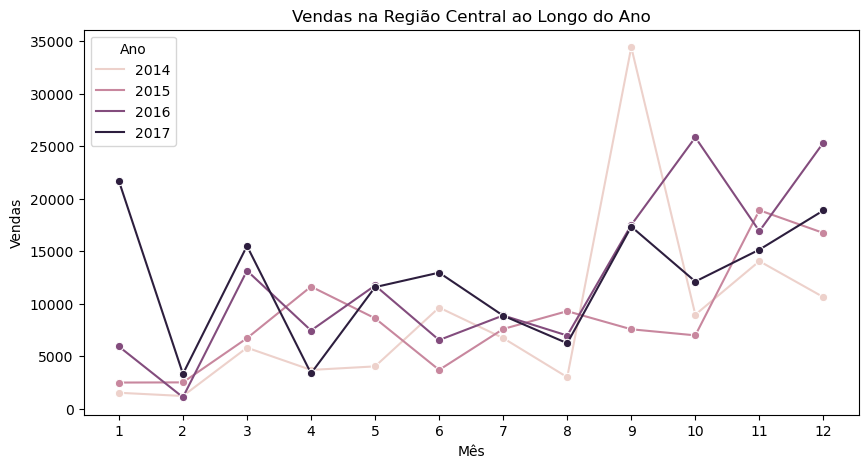

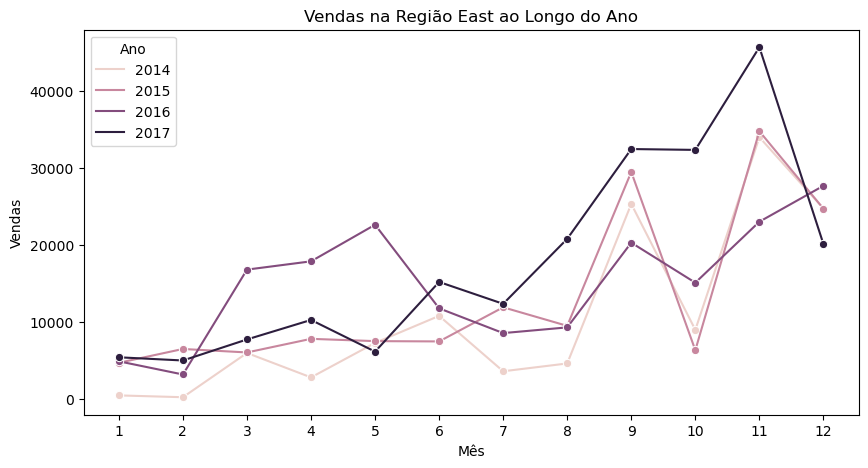

In [23]:
#Existem meses específicos em que certas regiões ou segmentos de clientes compram mais ou menos?
tabelaRegiao = df.groupby(['Region', 'Ano', 'Mes'])['Sales'].sum().reset_index()
tabelaSegmento = df.groupby(['Segment', 'Ano', 'Mes'])['Sales'].sum().reset_index()

# Regiões
for regiao in df['Region'].unique():
    df_aux = tabelaRegiao[tabelaRegiao['Region'] == regiao]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Mes', y='Sales', hue='Ano', data=df_aux, marker='o')
    plt.title(f'Vendas na Região {regiao} ao Longo do Ano')
    plt.xlabel('Mês')
    plt.ylabel('Vendas')
    plt.xticks(range(1, 13))
    plt.show()



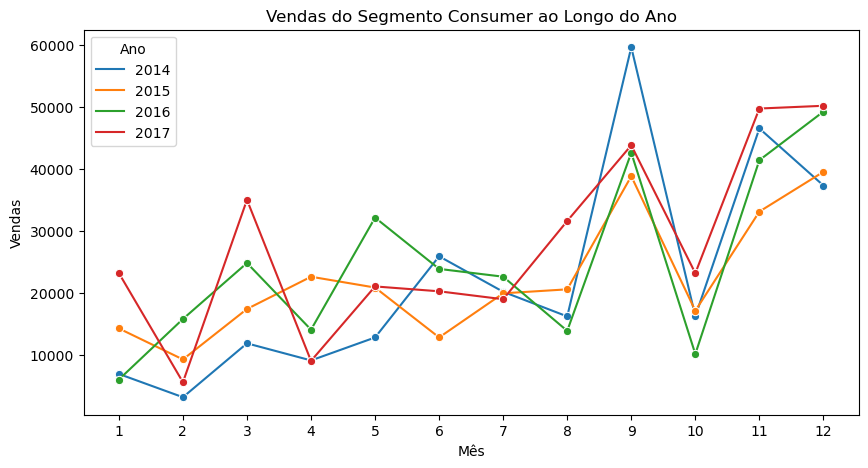

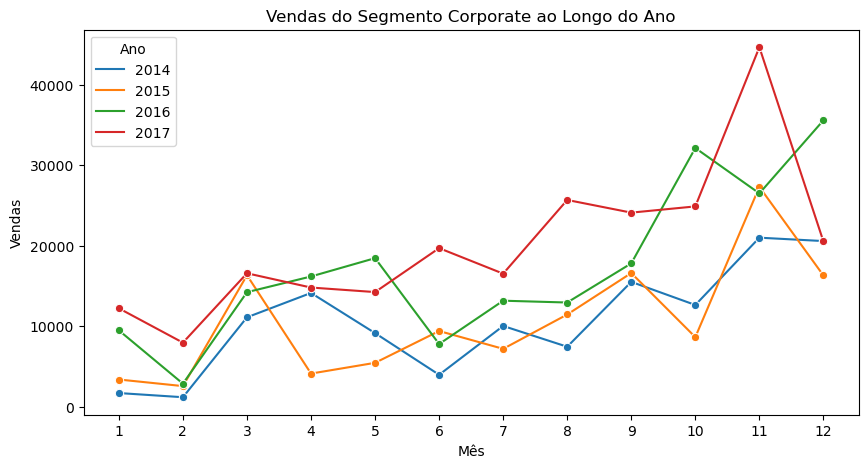

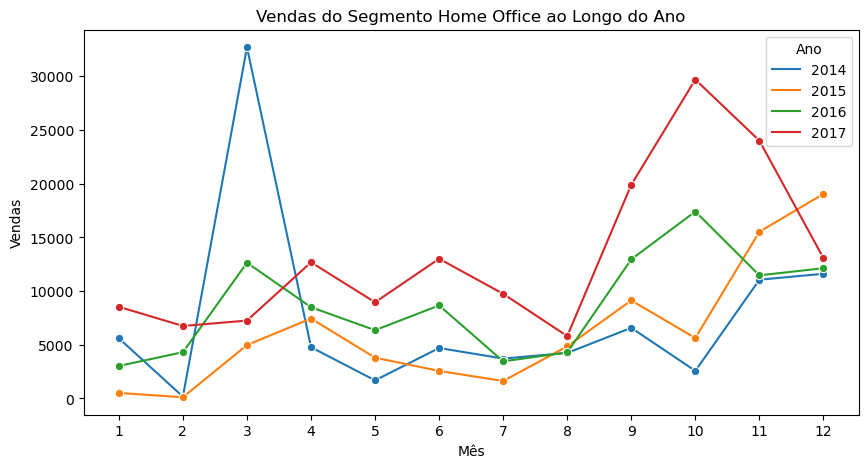

In [24]:
# Segmentos
for segmento in df['Segment'].unique():
    df_aux = tabelaSegmento[tabelaSegmento['Segment'] == segmento]
    plt.figure(figsize=(10,5))
    sns.lineplot(x='Mes', y='Sales', hue='Ano', data=df_aux, marker='o', palette='tab10')
    plt.title(f'Vendas do Segmento {segmento} ao Longo do Ano')
    plt.xlabel('Mês')
    plt.ylabel('Vendas')
    plt.xticks(range(1, 13))
    plt.show()

In [25]:
#Análise de Performance por Cliente:
#Quem são os nossos principais clientes em termos de vendas e lucro gerado?
tabelaClientes = df.groupby('Customer ID')['Sales', 'Profit'].sum().reset_index()
tabelaClientes['Porcentagem'] = tabelaClientes['Profit'] / tabelaClientes['Sales']

# Principais clientes em termos de vendas
clientes_mais_vendas = tabelaClientes.sort_values('Sales', ascending=False).head(10)
print("Principais clientes em termos de vendas:")
display(clientes_mais_vendas)

# Principais clientes em termos de lucro
clientes_mais_lucro = tabelaClientes.sort_values('Profit', ascending=False).head(10)
print("\nPrincipais clientes em termos de lucro:")
display(clientes_mais_lucro)

Principais clientes em termos de vendas:


C:\Users\mneto\AppData\Local\Temp\ipykernel_10992\2417065387.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tabelaClientes = df.groupby('Customer ID')['Sales', 'Profit'].sum().reset_index()


,Customer ID,Sales,Profit,Porcentagem
700,SM-20320,25043.05000,-1980.73930,-0.07909
741,TC-20980,19052.21800,8981.32390,0.47141
621,RB-19360,15117.33900,6976.09590,0.46146
730,TA-21385,14595.62000,4703.78830,0.32227
6,AB-10105,14473.57100,5444.80550,0.37619
434,KL-16645,14175.22900,806.85500,0.05692
669,SC-20095,14142.33400,5757.41190,0.40710
327,HL-15040,12873.29800,5622.42920,0.43675
683,SE-20110,12209.43800,2650.67690,0.21710
131,CC-12370,12129.07200,2177.04930,0.17949



Principais clientes em termos de lucro:


,Customer ID,Sales,Profit,Porcentagem
741,TC-20980,19052.21800,8981.32390,0.47141
621,RB-19360,15117.33900,6976.09590,0.46146
669,SC-20095,14142.33400,5757.41190,0.40710
327,HL-15040,12873.29800,5622.42920,0.43675
6,AB-10105,14473.57100,5444.80550,0.37619
730,TA-21385,14595.62000,4703.78830,0.32227
160,CM-12385,8954.02000,3899.89040,0.43555
424,KD-16495,8181.25600,3038.62540,0.37141
48,AR-10540,6608.44800,2884.62080,0.43651
234,DR-12940,8350.86800,2869.07600,0.34357


In [26]:
#Algum cliente representa uma porcentagem desproporcional do total de vendas?

# Calculando a porcentagem de vendas de cada cliente em relação ao total
tabelaClientes['Porcentagem_Vendas'] = tabelaClientes['Sales'] / tabelaClientes['Sales'].sum()

# Clientes com mais de 1% das vendas
clientes_mais_vendas = tabelaClientes[tabelaClientes['Porcentagem_Vendas'] > 0.01]
print("Clientes com mais de 1% das vendas:")
display(clientes_mais_vendas)



Clientes com mais de 1% das vendas:


,Customer ID,Sales,Profit,Porcentagem,Porcentagem_Vendas
700,SM-20320,25043.05000,-1980.73930,-0.07909,0.01090


C:\Users\mneto\AppData\Local\Temp\ipykernel_10992\977973069.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tabelaClientes = df.groupby('Customer ID')['Sales', 'Profit'].sum().reset_index()


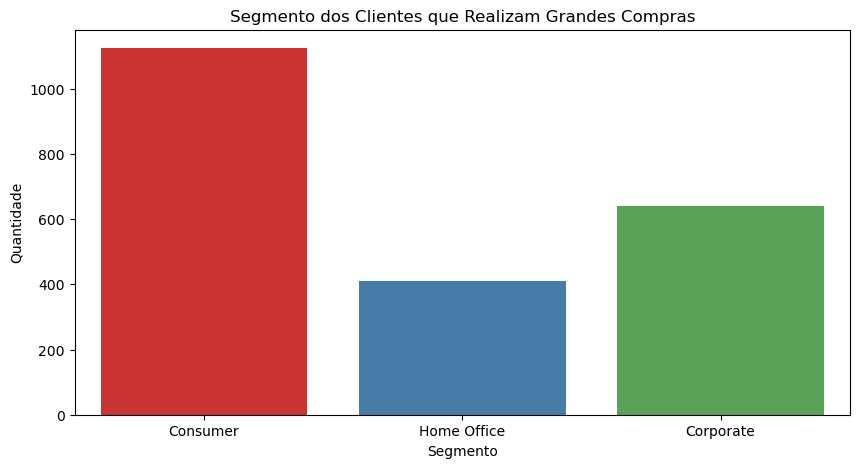

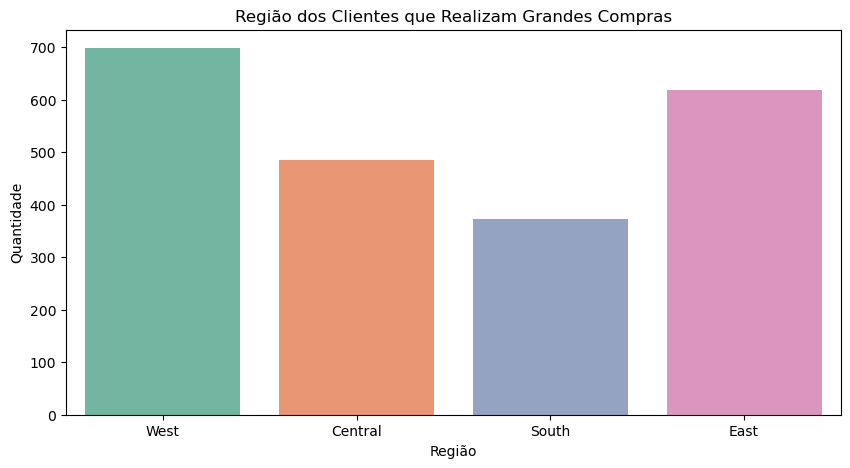

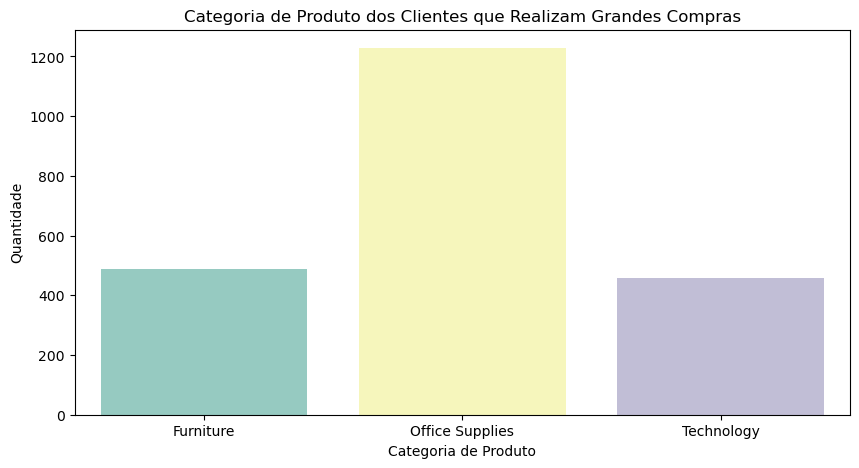

In [27]:
#Existe algum padrão nos clientes que realizam grandes compras (por exemplo, segmento, região ou categoria de produto)?
tabelaClientes = df.groupby('Customer ID')['Sales', 'Profit'].sum().reset_index()
tabelaClientes['Porcentagem'] = tabelaClientes['Profit'] / tabelaClientes['Sales']

# Clientes que realizam grandes compras (Vendas acima de 5000)
grandes_compras = tabelaClientes[tabelaClientes['Sales'] > 5000]

# Padrões nos clientes que realizam grandes compras
tabelaClientesGrandesCompras = df[df['Customer ID'].isin(grandes_compras['Customer ID'])]

# Segmento
plt.figure(figsize=(10,5))
sns.countplot(x='Segment', data=tabelaClientesGrandesCompras, palette='Set1')
plt.title('Segmento dos Clientes que Realizam Grandes Compras')
plt.xlabel('Segmento')
plt.ylabel('Quantidade')
plt.show()

# Região
plt.figure(figsize=(10,5))
sns.countplot(x='Region', data=tabelaClientesGrandesCompras, palette='Set2')
plt.title('Região dos Clientes que Realizam Grandes Compras')
plt.xlabel('Região')
plt.ylabel('Quantidade')
plt.show()

# Categoria de Produto
plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=tabelaClientesGrandesCompras, palette='Set3')
plt.title('Categoria de Produto dos Clientes que Realizam Grandes Compras')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade')
plt.show()